# Accidental Drug Overdoses

In [51]:
## import modules and csv

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

file_path = '../data_files/Accidental_Drug_Related_Deaths_2012-2022.csv'
df = pd.read_csv(file_path)
df.head()

,Date,Date Type,Age,Sex,Race,Ethnicity,Residence City,Residence County,Residence State,Injury City,...,Xylazine,Gabapentin,Opiate NOS,Heroin/Morph/Codeine,Other Opioid,Any Opioid,Other,ResidenceCityGeo,InjuryCityGeo,DeathCityGeo
0,05/29/2012,Date of death,37.0,Male,Black,NaN,STAMFORD,FAIRFIELD,NaN,STAMFORD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"STAMFORD, CT\n(41.051924, -73.539475)","STAMFORD, CT\n(41.051924, -73.539475)","CT\n(41.575155, -72.738288)"
1,06/27/2012,Date of death,37.0,Male,White,NaN,NORWICH,NEW LONDON,NaN,NORWICH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NORWICH, CT\n(41.524304, -72.075821)","NORWICH, CT\n(41.524304, -72.075821)","Norwich, CT\n(41.524304, -72.075821)"
2,03/24/2014,Date of death,28.0,Male,White,NaN,HEBRON,NaN,NaN,HEBRON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"HEBRON, CT\n(41.658069, -72.366324)","HEBRON, CT\n(41.658069, -72.366324)","Marlborough, CT\n(41.632043, -72.461309)"
3,12/31/2014,Date of death,26.0,Female,White,NaN,BALTIC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BALTIC, CT\n(41.617221, -72.085031)","CT\n(41.575155, -72.738288)","Baltic, CT\n(41.617221, -72.085031)"
4,01/16/2016,Date of death,41.0,Male,White,NaN,SHELTON,FAIRFIELD,CT,SHELTON,...,NaN,NaN,NaN,NaN,NaN,Y,NaN,"SHELTON, CT\n(41.316843, -73.092968)","SHELTON, CT\n(41.316843, -73.092968)","Bridgeport, CT\n(41.179195, -73.189476)"


### Adjust column names and view them

In [52]:
## replace spaces in columns with '_'

list_of_col = df.columns
list_of_col = list_of_col.str.lower().str.replace(' ','_')
df.columns = list_of_col
df.columns

Index(['date', 'date_type', 'age', 'sex', 'race', 'ethnicity',
       'residence_city', 'residence_county', 'residence_state', 'injury_city',
       'injury_county', 'injury_state', 'injury_place',
       'description_of_injury', 'death_city', 'death_county', 'death_state',
       'location', 'location_if_other', 'cause_of_death', 'manner_of_death',
       'other_significant_conditions_', 'heroin',
       'heroin_death_certificate_(dc)', 'cocaine', 'fentanyl',
       'fentanyl_analogue', 'oxycodone', 'oxymorphone', 'ethanol',
       'hydrocodone', 'benzodiazepine', 'methadone', 'meth/amphetamine',
       'amphet', 'tramad', 'hydromorphone', 'morphine_(not_heroin)',
       'xylazine', 'gabapentin', 'opiate_nos', 'heroin/morph/codeine',
       'other_opioid', 'any_opioid', 'other', 'residencecitygeo',
       'injurycitygeo', 'deathcitygeo'],
      dtype='object')

In [53]:
## view original shape of the data frame 

df.shape

(10654, 48)

### Convert dates to datetime

In [54]:
## reformat the date column

df['date_dt'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Data Cleaning

In [55]:
## drop original date column since we made a new one

df.drop('date', axis=1, inplace=True) 

In [56]:
## printing value counts for drug columns to see what needs to be fixed

print(df['heroin'].value_counts())
print(df['ethanol'].value_counts())
print(df['cocaine'].value_counts())
print(df['fentanyl'].value_counts())
print(df['fentanyl_analogue'].value_counts())
print(df['oxycodone'].value_counts())
print(df['oxymorphone'].value_counts())
print(df['hydrocodone'].value_counts())
print(df['benzodiazepine'].value_counts())
print(df['methadone'].value_counts())
print(df['meth/amphetamine'].value_counts())
print(df['amphet'].value_counts())
print(df['tramad'].value_counts())
print(df['hydromorphone'].value_counts())
print(df['morphine_(not_heroin)'].value_counts())
print(df['xylazine'].value_counts())
print(df['gabapentin'].value_counts())
print(df['opiate_nos'].value_counts())
print(df['heroin/morph/codeine'].value_counts())
print(df['other_opioid'].value_counts())
print(df['any_opioid'].value_counts())
print(df['other'].value_counts())

heroin
Y    3472
Name: count, dtype: int64
ethanol
Y    2877
P       1
Name: count, dtype: int64
cocaine
Y    3855
Name: count, dtype: int64
fentanyl
Y           6923
Y POPS         1
Y (PTCH)       1
Name: count, dtype: int64
fentanyl_analogue
Y    804
Name: count, dtype: int64
oxycodone
Y    950
Name: count, dtype: int64
oxymorphone
Y    157
Name: count, dtype: int64
hydrocodone
Y    163
Name: count, dtype: int64
benzodiazepine
Y    2499
Name: count, dtype: int64
methadone
Y    938
Name: count, dtype: int64
meth/amphetamine
Y    127
Name: count, dtype: int64
amphet
Y    359
Name: count, dtype: int64
tramad
Y    284
Name: count, dtype: int64
hydromorphone
Y    67
Name: count, dtype: int64
morphine_(not_heroin)
Y                   52
NO RX BUT STRAWS     1
STOLE MEDS           1
PCP NEG              1
Name: count, dtype: int64
xylazine
Y    792
Name: count, dtype: int64
gabapentin
Y    347
y      1
Name: count, dtype: int64
opiate_nos
Y    126
Name: count, dtype: int64
heroin/morph/cod

In [57]:
# Replace values in each column to be 'Y'

replace_values = {
    'fentanyl': ['Y POPS', 'Y (PTCH)'],
    'morphine_(not_heroin)': ['NO RX BUT STRAWS', 'STOLE MEDS', 'PCP NEG'],
    'gabapentin': ['y'],
    'heroin/morph/codeine': ['y'],
    'other_opioid': ['Buprenorphine', 'PCP', 'Difluro', 'pcp', 'MDMA, Buprenorphine', 'ketamine', 'Mitragynine'],
    'ethanol': ['P']
}

for column, values_to_replace in replace_values.items():
    df[column] = df[column].replace(values_to_replace, 'Y')

In [58]:
## recheck value counts to make sure everything is 'Y'

print(df['heroin'].value_counts())
print(df['ethanol'].value_counts())
print(df['cocaine'].value_counts())
print(df['fentanyl'].value_counts())
print(df['fentanyl_analogue'].value_counts())
print(df['oxycodone'].value_counts())
print(df['oxymorphone'].value_counts())
print(df['hydrocodone'].value_counts())
print(df['benzodiazepine'].value_counts())
print(df['methadone'].value_counts())
print(df['meth/amphetamine'].value_counts())
print(df['amphet'].value_counts())
print(df['tramad'].value_counts())
print(df['hydromorphone'].value_counts())
print(df['morphine_(not_heroin)'].value_counts())
print(df['xylazine'].value_counts())
print(df['gabapentin'].value_counts())
print(df['opiate_nos'].value_counts())
print(df['heroin/morph/codeine'].value_counts())
print(df['other_opioid'].value_counts())
print(df['any_opioid'].value_counts())
print(df['other'].value_counts())

heroin
Y    3472
Name: count, dtype: int64
ethanol
Y    2878
Name: count, dtype: int64
cocaine
Y    3855
Name: count, dtype: int64
fentanyl
Y    6925
Name: count, dtype: int64
fentanyl_analogue
Y    804
Name: count, dtype: int64
oxycodone
Y    950
Name: count, dtype: int64
oxymorphone
Y    157
Name: count, dtype: int64
hydrocodone
Y    163
Name: count, dtype: int64
benzodiazepine
Y    2499
Name: count, dtype: int64
methadone
Y    938
Name: count, dtype: int64
meth/amphetamine
Y    127
Name: count, dtype: int64
amphet
Y    359
Name: count, dtype: int64
tramad
Y    284
Name: count, dtype: int64
hydromorphone
Y    67
Name: count, dtype: int64
morphine_(not_heroin)
Y    55
Name: count, dtype: int64
xylazine
Y    792
Name: count, dtype: int64
gabapentin
Y    348
Name: count, dtype: int64
opiate_nos
Y    126
Name: count, dtype: int64
heroin/morph/codeine
Y    2090
Name: count, dtype: int64
other_opioid
Y    128
Name: count, dtype: int64
any_opioid
Y    7612
N       8
Name: count, dtype: int6

In [59]:
## other column had more to fix, so we did it seperately

df['other'] = df['other'].apply(lambda x: 'Y' if pd.notna(x) and x != '' else x)

In [60]:
## double-check that the other column was properly fixed

print(df['other'].value_counts())

other
Y    692
Name: count, dtype: int64


In [61]:
## changing all Nan to 'N' for no

df['heroin'].fillna('N', inplace=True) 
df['cocaine'].fillna('N', inplace=True)
df['fentanyl'].fillna('N', inplace=True)
df['fentanyl_analogue'].fillna('N', inplace=True)
df['oxycodone'].fillna('N', inplace=True)
df['oxymorphone'].fillna('N', inplace=True)
df['ethanol'].fillna('N', inplace=True)
df['hydrocodone'].fillna('N', inplace=True)
df['benzodiazepine'].fillna('N', inplace=True)
df['methadone'].fillna('N', inplace=True)
df['meth/amphetamine'].fillna('N', inplace=True)
df['amphet'].fillna('N', inplace=True)
df['tramad'].fillna('N', inplace=True)
df['hydromorphone'].fillna('N', inplace=True)
df['morphine_(not_heroin)'].fillna('N', inplace=True)
df['xylazine'].fillna('N', inplace=True)
df['gabapentin'].fillna('N', inplace=True)
df['opiate_nos'].fillna('N', inplace=True)
df['heroin/morph/codeine'].fillna('N', inplace=True)
df['other_opioid'].fillna('N', inplace=True)
df['any_opioid'].fillna('N', inplace=True)
df['other'].fillna('N', inplace=True)

### Combining Drug Columns

In [62]:
## combine 2 fentranyl columns into 1

df['fentanyl'] = df[['fentanyl', 'fentanyl_analogue']].max(axis=1)

In [63]:
## dropping heroin death certificate column because it is same as heroin column
## drop fentanyl_analogue column because we combined it with the other fentanyl column

df.drop('heroin_death_certificate_(dc)', axis=1, inplace=True)
df.drop('fentanyl_analogue', axis=1, inplace=True)

In [64]:
#combine drugs into broader groups

df['Opioids'] = df[['oxycodone', 'oxymorphone', 'hydrocodone', 'methadone', 'tramad', 
'hydromorphone', 'morphine_(not_heroin)', 'opiate_nos', 'heroin/morph/codeine',
'other_opioid']].max(axis=1)
df['Stimulants'] = df[['meth/amphetamine', 'amphet']].max(axis=1)
df['Other Depressants'] = df[['xylazine', 'gabapentin']].max(axis=1)
df['Other'] = df['other']

In [65]:
# Drop the original drug columns

df.drop(['oxycodone', 'oxymorphone', 'hydrocodone', 'methadone', 'tramad', 'hydromorphone', 
'morphine_(not_heroin)', 'opiate_nos', 'heroin/morph/codeine', 'other_opioid', 'any_opioid', 
'meth/amphetamine', 'amphet', 'xylazine', 'gabapentin', 'other'], axis=1, inplace=True)

In [66]:
## view new columns

df.columns

Index(['date_type', 'age', 'sex', 'race', 'ethnicity', 'residence_city',
       'residence_county', 'residence_state', 'injury_city', 'injury_county',
       'injury_state', 'injury_place', 'description_of_injury', 'death_city',
       'death_county', 'death_state', 'location', 'location_if_other',
       'cause_of_death', 'manner_of_death', 'other_significant_conditions_',
       'heroin', 'cocaine', 'fentanyl', 'ethanol', 'benzodiazepine',
       'residencecitygeo', 'injurycitygeo', 'deathcitygeo', 'date_dt',
       'Opioids', 'Stimulants', 'Other Depressants', 'Other'],
      dtype='object')

### Creating Drug Combination Columns

In [68]:
import pandas as pd
import numpy as np
from itertools import combinations

# List of drug columns
drug_columns = ['heroin', 'cocaine', 'fentanyl', 'ethanol', 'benzodiazepine', 'Opioids', 'Stimulants', 'Other Depressants', 'Other']

# Generate all combinations of drugs
combination_columns = [
    '_and_'.join(combo)
    for combo_size in range(2, min(4, len(drug_columns) + 1))
    for combo in combinations(drug_columns, combo_size)
]

# Create combination columns
for combo_column in combination_columns:
    df[combo_column] = np.where(df[list(combo_column.split('_and_'))].eq('Y').all(axis=1), 'Y', 'N')

# Ensure mutual exclusivity and set 'Y' only in the largest combination column
for index, row in df.iterrows():
    active_combinations = [col for col in df.columns if col.startswith('_and_') and row[col] == 'Y']

    if len(active_combinations) > 1:
        # Find the column with the highest order and set 'Y' only in that column
        max_order = max([len(combo.split('_and_')) for combo in active_combinations])
        largest_combination_column = [col for col in active_combinations if len(col.split('_and_')) == max_order]

        for col in active_combinations:
            if col != largest_combination_column[0]:
                df.at[index, col] = 'N'

# Check if there's 'Y' in multiple columns (including both individual and combination columns)
y_counts = df[drug_columns + combination_columns].eq('Y').sum(axis=1)

# Find the column with the highest order and set 'Y' only in that column
for index, row in df.iterrows():
    if y_counts[index] > 1:
        active_combinations = [col for col in drug_columns + combination_columns if row[col] == 'Y']
        largest_combination_column = max(active_combinations, key=len)
        
        for col in active_combinations:
            if col != largest_combination_column:
                df.at[index, col] = 'N'

# Print some information for debugging
print("Total Rows in DataFrame:", len(df))

# Calculate the total number of 'Y' values in each column (individual drugs and combinations)
column_counts = df[drug_columns + combination_columns].eq('Y').sum()
print("Total Count for Each Column:")
print(column_counts)

# Select the top columns with the most 'Y' values
top_columns = column_counts[column_counts > 0].index

# Print the top columns and their counts
top_columns_df = pd.DataFrame({'Column': top_columns, 'Count': column_counts[top_columns]})
print("Top Columns and Counts:")
print(top_columns_df)


/var/folders/yz/4cp6pgjs15557501pzlfbbt80000gn/T/ipykernel_61009/3467405179.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[combo_column] = np.where(df[list(combo_column.split('_and_'))].eq('Y').all(axis=1), 'Y', 'N')
/var/folders/yz/4cp6pgjs15557501pzlfbbt80000gn/T/ipykernel_61009/3467405179.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[combo_column] = np.where(df[list(combo_column.split('_and_'))].eq('Y').all(axis=1), 'Y', 'N')
/var/folders/yz/4cp6pgjs15557501pzlfbbt80000gn/T/ipykernel_61009/3467405179.py:19:

Total Rows in DataFrame: 10654
Total Count for Each Column:
heroin                                             347
cocaine                                            380
fentanyl                                          1055
ethanol                                             30
benzodiazepine                                      31
                                                  ... 
benzodiazepine_and_Other Depressants_and_Other       1
Opioids_and_Stimulants_and_Other Depressants         0
Opioids_and_Stimulants_and_Other                     3
Opioids_and_Other Depressants_and_Other              5
Stimulants_and_Other Depressants_and_Other           0
Length: 129, dtype: int64
Top Columns and Counts:
                                                                                               Column  \
heroin                                                                                         heroin   
cocaine                                                                    

In [69]:
# Check the counts for each combination column
for col in combination_columns:
    count = df[col].eq('Y').sum()
    print(f"{col}: {count}")

# Check the counts for individual drug columns
for col in drug_columns:
    count = df[col].eq('Y').sum()
    print(f"{col}: {count}")

heroin_and_cocaine: 145
heroin_and_fentanyl: 151
heroin_and_ethanol: 96
heroin_and_benzodiazepine: 54
heroin_and_Opioids: 294
heroin_and_Stimulants: 3
heroin_and_Other Depressants: 0
heroin_and_Other: 15
cocaine_and_fentanyl: 834
cocaine_and_ethanol: 82
cocaine_and_benzodiazepine: 17
cocaine_and_Opioids: 78
cocaine_and_Stimulants: 9
cocaine_and_Other Depressants: 7
cocaine_and_Other: 17
fentanyl_and_ethanol: 490
fentanyl_and_benzodiazepine: 285
fentanyl_and_Opioids: 184
fentanyl_and_Stimulants: 37
fentanyl_and_Other Depressants: 211
fentanyl_and_Other: 39
ethanol_and_benzodiazepine: 107
ethanol_and_Opioids: 150
ethanol_and_Stimulants: 8
ethanol_and_Other Depressants: 4
ethanol_and_Other: 23
benzodiazepine_and_Opioids: 285
benzodiazepine_and_Stimulants: 3
benzodiazepine_and_Other Depressants: 2
benzodiazepine_and_Other: 46
Opioids_and_Stimulants: 8
Opioids_and_Other Depressants: 15
Opioids_and_Other: 37
Stimulants_and_Other Depressants: 0
Stimulants_and_Other: 5
Other Depressants_and_Ot

In [71]:
# Calculate the total number of 'Y' values in each column (individual drugs and combinations)
column_counts = df[drug_columns + combination_columns].apply(lambda col: col.value_counts().get('Y', 0))

# Select the top 10 columns with the most 'Y' values
top_columns = column_counts.nlargest(10).index

# Print the top columns and their counts
top_columns_df = pd.DataFrame({'Column': top_columns, 'Count': column_counts[top_columns]})
print("Top Columns and Counts:")
print(top_columns_df)

Top Columns and Counts:
                                                                                Column  \
fentanyl                                                                      fentanyl   
cocaine_and_fentanyl                                              cocaine_and_fentanyl   
cocaine_and_fentanyl_and_ethanol                      cocaine_and_fentanyl_and_ethanol   
fentanyl_and_ethanol                                              fentanyl_and_ethanol   
heroin_and_fentanyl_and_Opioids                        heroin_and_fentanyl_and_Opioids   
cocaine                                                                        cocaine   
cocaine_and_fentanyl_and_Opioids                      cocaine_and_fentanyl_and_Opioids   
heroin                                                                          heroin   
Opioids                                                                        Opioids   
cocaine_and_fentanyl_and_Other Depressants  cocaine_and_fentanyl_and_Other D

In [72]:
# Keep only the selected top 10 columns in the DataFrame
other_columns = ['date_type', 'age', 'sex', 'race', 'ethnicity', 'residence_city',
       'residence_county', 'residence_state', 'injury_city', 'injury_county',
       'injury_state', 'injury_place', 'description_of_injury', 'death_city',
       'death_county', 'death_state', 'location', 'location_if_other',
       'cause_of_death', 'manner_of_death', 'other_significant_conditions_',
       'residencecitygeo', 'injurycitygeo', 'deathcitygeo', 'date_dt'] + list(top_columns)

## create seperate data frame for analysis 

df = df[other_columns]
df_filtered = df[~(df[list(top_columns)] == 'N').all(axis=1)]


In [74]:
# Print the top columns as table

column_counts = df[top_columns].eq('Y').sum()
top_columns_df = pd.DataFrame({'Column': column_counts.index, 'Count': column_counts.values})
print(top_columns_df)

                                       Column  Count
0                                    fentanyl   1055
1                        cocaine_and_fentanyl    834
2            cocaine_and_fentanyl_and_ethanol    527
3                        fentanyl_and_ethanol    490
4             heroin_and_fentanyl_and_Opioids    421
5                                     cocaine    380
6            cocaine_and_fentanyl_and_Opioids    363
7                                      heroin    347
8                                     Opioids    326
9  cocaine_and_fentanyl_and_Other Depressants    319


In [76]:
df.columns

Index(['date_type', 'age', 'sex', 'race', 'ethnicity', 'residence_city',
       'residence_county', 'residence_state', 'injury_city', 'injury_county',
       'injury_state', 'injury_place', 'description_of_injury', 'death_city',
       'death_county', 'death_state', 'location', 'location_if_other',
       'cause_of_death', 'manner_of_death', 'other_significant_conditions_',
       'residencecitygeo', 'injurycitygeo', 'deathcitygeo', 'date_dt',
       'fentanyl', 'cocaine_and_fentanyl', 'cocaine_and_fentanyl_and_ethanol',
       'fentanyl_and_ethanol', 'heroin_and_fentanyl_and_Opioids', 'cocaine',
       'cocaine_and_fentanyl_and_Opioids', 'heroin', 'Opioids',
       'cocaine_and_fentanyl_and_Other Depressants'],
      dtype='object')

In [77]:
## drop unnecessary columns

df.drop(['injury_county', 'injury_state', 'injury_place', 'description_of_injury', 'location', 
'location_if_other' ], axis=1, inplace=True)

### Plot fentanyl as function of time

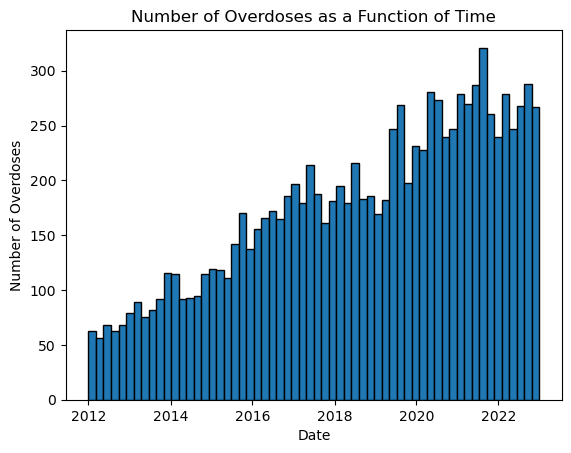

In [78]:
plt.hist(df['date_dt'], bins=60, edgecolor = 'black') #binned into 4 month chunks
plt.xlabel('Date')
plt.ylabel('Number of Overdoses')
plt.title('Number of Overdoses as a Function of Time')
plt.show()

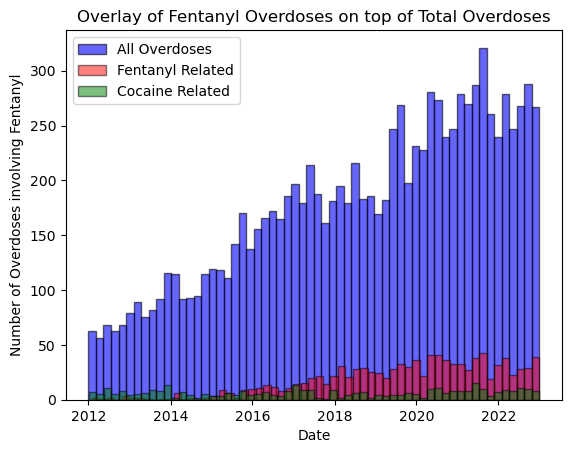

In [79]:
df_fent = df[df['fentanyl'] == 'Y']
df_fent = df[df['fentanyl'] == 'Y']
#df_fent = df[(df['fentanyl'] == 'Y') | (df['fentanyl_analogue'] == 'Y')]
df_cocaine = df[df['cocaine'] == 'Y']

plt.hist(df['date_dt'], bins=60, edgecolor = 'black', color = 'blue', alpha = 0.6, label = 'All Overdoses') #binned into 4 month chunks
plt.hist(df_fent['date_dt'], bins=60, edgecolor = 'black', color = 'red', alpha = 0.5, label = 'Fentanyl Related') #binned into 4 month chunks
plt.hist(df_cocaine['date_dt'], bins=60, edgecolor = 'black', color = 'green', alpha = 0.5, label = 'Cocaine Related') #binned into 4 month chunks
plt.xlabel('Date')
plt.ylabel('Number of Overdoses involving Fentanyl')
plt.title('Overlay of Fentanyl Overdoses on top of Total Overdoses')
plt.legend(loc='upper left')
plt.show()

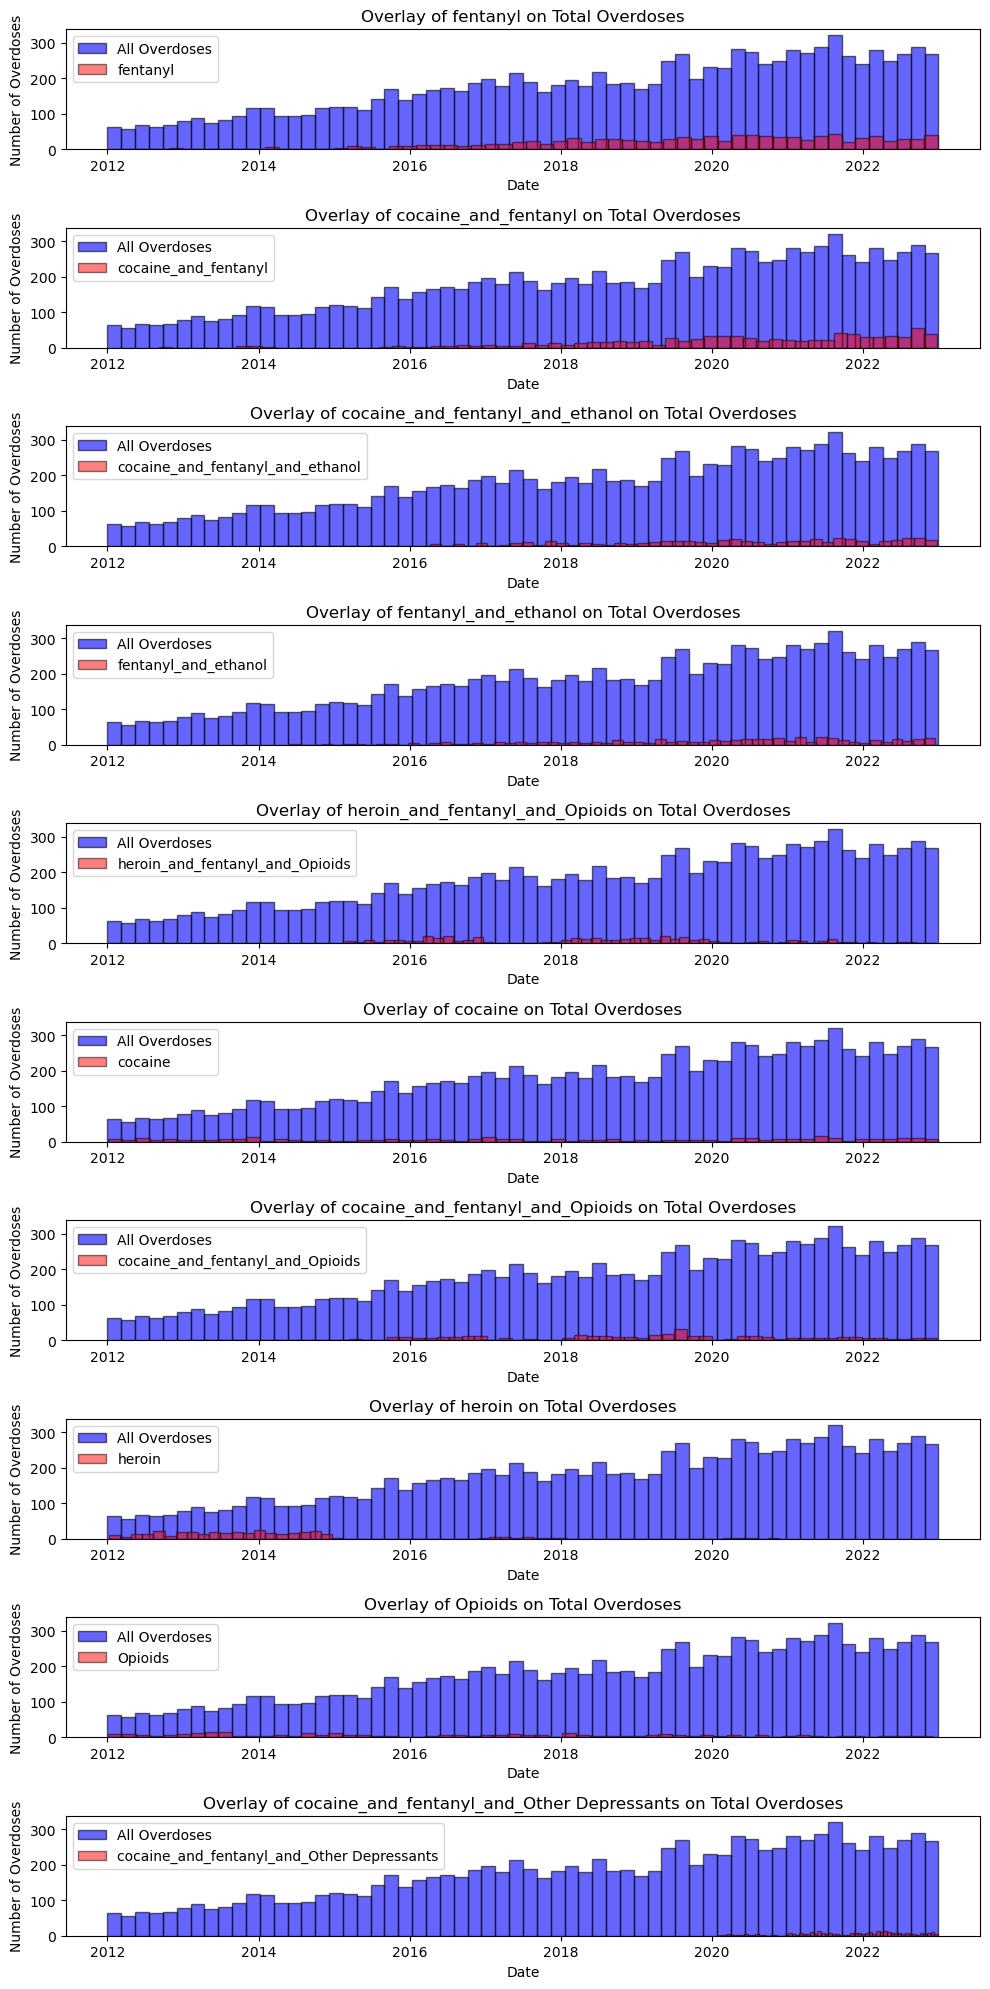

In [80]:
# Plot each field on a separate chart
fig, axes = plt.subplots(nrows=len(list(top_columns)), figsize=(10, 2 * len(list(top_columns))))

# Plot the histogram for total overdoses on each subplot
for i, field in enumerate(list(top_columns)):
    axes[i].hist(df['date_dt'], bins=60, edgecolor='black', color='blue', alpha=0.6, label='All Overdoses')  # binned into 4 month chunks
    
    # Overlay histogram for the specific field
    axes[i].hist(df[df[field] == 'Y']['date_dt'], bins=60, edgecolor='black', color='red', alpha=0.5, label=field)
    
    axes[i].set_title(f'Overlay of {field} on Total Overdoses')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Number of Overdoses')
    axes[i].legend(loc='upper left')

plt.tight_layout()
plt.show()

### Overdoses by Race

In [81]:
#reassign races to bucket into fewer outcomes
race_dict = {'American Indian or Alaska Native' : 'Other', 'Asian Indian' : 'Asian', 
             'Asian, Other' : 'Asian', 'Asian/Indian': 'Asian', 'Black' : 'Black', 
             'Black or African American' : 'Black', 'Chinese' : 'Asian', 'Hawaiian' : 'Other',
             'Korean' : 'Asian', 'Native American, Other' : 'Other', 'Other' : 'Other', 
             'Other Asian' : 'Asian', 'Unknown' : 'Unknown', 'White' : 'White', np.nan : 'Unknown'}

#function to re-bin races into smaller bins
def bin_race(race, race_dict):
    binned_race = race_dict[race]
    return binned_race

#run function
df['race_binned'] = df['race'].apply(bin_race, race_dict = race_dict)
df_filtered['race_binned'] = df_filtered['race'].apply(bin_race, race_dict = race_dict)


/var/folders/yz/4cp6pgjs15557501pzlfbbt80000gn/T/ipykernel_61009/2787078720.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['race_binned'] = df_filtered['race'].apply(bin_race, race_dict = race_dict)


In [82]:
## print gender by race table

gender_by_race = df.groupby('race_binned').apply(lambda x: x['sex'].value_counts())
gender_by_race['M:F Ratio'] = gender_by_race['Male']/gender_by_race['Female']
gender_by_race

sex,Male,Female,M:F Ratio
race_binned,,,
Asian,46,19,2.421053
Black,1022,347,2.945245
Other,43,10,4.300000
Unknown,67,19,3.526316
White,6712,2360,2.844068


## Import Median Household Income Data and Estimated Population Data

Datasets:
- income: https://acs2019.ctdata.org/#:~:text=Exploring%20Median%20Household%20IncomePer%20Capita,Darker%20blues%20represent%20higher%20values
- population: https://portal.ct.gov/DPH/Health-Information-Systems--Reporting/Population/Annual-Town-and-County-Population-for-Connecticut


In [83]:
#Importing and cleaning income data
income_df = pd.read_excel('../data_files/CT_Household_Income_Data.xlsx')

#split the median income from the stdev
income_df['household_income_avg'] = income_df['ACS 2015-2019'].apply(lambda x: x.split('± ')[0]).str.replace('[\$,]','', regex = True).astype('int')
income_df['household_income_std'] = income_df['ACS 2015-2019'].apply(lambda x: x.split('± ')[1]).str.replace('[\$,]','', regex = True).astype('int')

#Add a log column
income_df['log_household_inc'] = np.log(income_df['household_income_avg'])

#drop extra columns and correct column names
income_df.drop(['ACS 2010-2014','ACS 2015-2019'] , axis = 1, inplace = True)
income_df.columns = ['city'] + list(income_df.columns[1:])
income_df['city'] = income_df['city'].str.upper()
income_df.head()

,city,household_income_avg,household_income_std,log_household_inc
0,ANDOVER,105328,9671,11.564835
1,ANSONIA,54901,6955,10.913287
2,ASHFORD,70952,9123,11.169759
3,AVON,131130,10475,11.783944
4,BARKHAMSTED,109688,10229,11.605395


In [84]:
#Importing and cleaning population data
pop_df = pd.read_excel('../data_files/CT_Population_2019.xlsx', header=1)
pop_df.columns = ['city', 'est_population']
pop_df['city'] = income_df['city'].str.upper()
pop_df.head()

#Merging income and population df's together
income_pop_df = pd.merge(income_df, pop_df, how = 'inner', on = 'city')
income_pop_df.head()

,city,household_income_avg,household_income_std,log_household_inc,est_population
0,ANDOVER,105328,9671,11.564835,3236
1,ANSONIA,54901,6955,10.913287,18654
2,ASHFORD,70952,9123,11.169759,4255
3,AVON,131130,10475,11.783944,18276
4,BARKHAMSTED,109688,10229,11.605395,3606


In [85]:
#Largest cities by population
income_pop_df.sort_values('est_population', ascending = False).head(10)

,city,household_income_avg,household_income_std,log_household_inc,est_population
14,BRIDGEPORT,46662,1322,10.750685,144399
92,NEW HAVEN,42222,1897,10.650697,130250
134,STAMFORD,93059,3444,11.440989,129638
63,HARTFORD,36278,1597,10.498967,122105
150,WATERBURY,42401,1495,10.654927,107568
102,NORWALK,85769,3501,11.359413,88816
33,DANBURY,73297,3928,11.202275,84694
88,NEW BRITAIN,46499,1969,10.747186,72495
154,WEST HAVEN,62985,3513,11.050652,62965
56,GREENWICH,152577,7666,11.935425,62840


### Collecting number of overdoses based on city (repeated for residence city, injury city, death city)

In [86]:
# Setup 3 different dataframes based on city classification

residence_by_city = pd.DataFrame(df.groupby('residence_city').size()).reset_index()
residence_by_city.columns = ['city', 'num_overdose']

injury_by_city = pd.DataFrame(df.groupby('injury_city').size()).reset_index()
injury_by_city.columns = ['city', 'num_overdose']

death_by_city = pd.DataFrame(df.groupby('death_city').size()).reset_index()
death_by_city.columns = ['city', 'num_overdose']
#----------------------------------------------------------------------

#Create merged df's
residence_city_merged = pd.merge(residence_by_city, income_pop_df, how = 'inner', on = 'city')
residence_city_merged['overdose_per_1000'] = residence_city_merged['num_overdose']/residence_city_merged['est_population']*1000

injury_city_merged = pd.merge(injury_by_city, income_pop_df, how = 'inner', on = 'city')
injury_city_merged['overdose_per_1000'] = injury_city_merged['num_overdose']/injury_city_merged['est_population']*1000

death_city_merged = pd.merge(death_by_city, income_pop_df, how = 'inner', on = 'city')
death_city_merged['overdose_per_1000'] = death_city_merged['num_overdose']/death_city_merged['est_population']*1000
residence_city_merged.head()

,city,num_overdose,household_income_avg,household_income_std,log_household_inc,est_population,overdose_per_1000
0,ANDOVER,4,105328,9671,11.564835,3236,1.236094
1,ANSONIA,84,54901,6955,10.913287,18654,4.503056
2,ASHFORD,7,70952,9123,11.169759,4255,1.645123
3,AVON,13,131130,10475,11.783944,18276,0.711315
4,BARKHAMSTED,6,109688,10229,11.605395,3606,1.663894


### Plot Total Overdoses Based on Income

Total Number of Overdoses


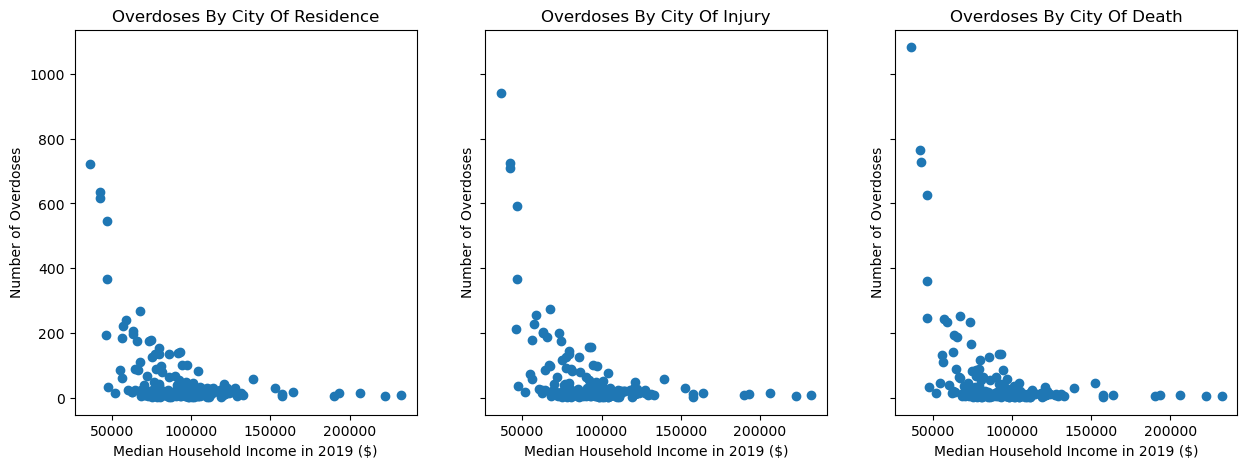

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Overdoses/1000 residents


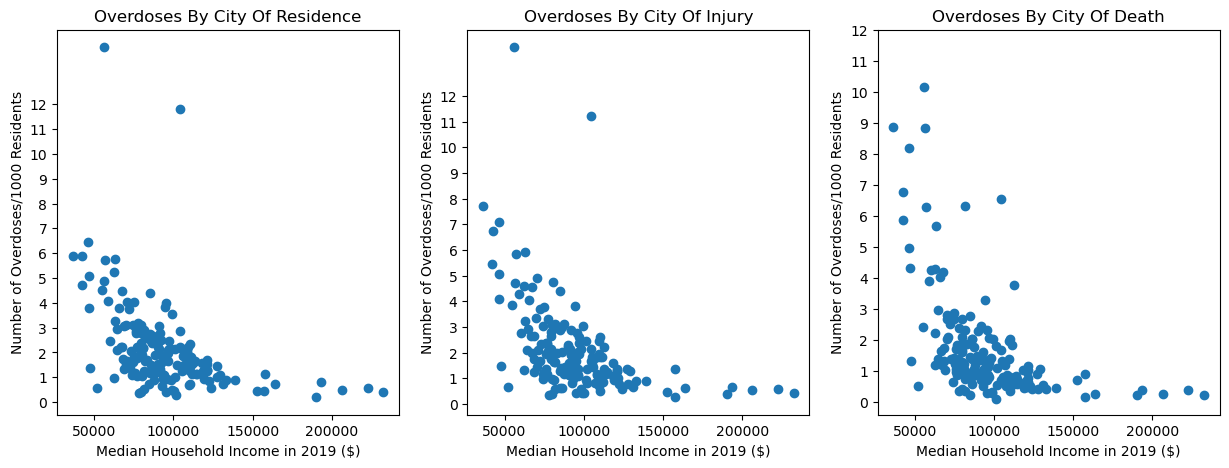

In [87]:
#Plot based on income

print('Total Number of Overdoses')
fig, ax = plt.subplots(1,3, figsize = (15,5), sharey=True)

dfs = [residence_city_merged, injury_city_merged, death_city_merged]
titles = ['Residence', 'Injury', 'Death']

for i, dataframe in enumerate(dfs):
    ax[i].scatter(dataframe['household_income_avg'], dataframe['num_overdose'])
    ax[i].set_xlabel('Median Household Income in 2019 ($)')
    ax[i].set_ylabel('Number of Overdoses')
    ax[i].set_title('Overdoses By City Of ' + titles[i])

plt.show()
print('-'*200)
print('Overdoses/1000 residents')
fig, ax = plt.subplots(1,3, figsize = (15,5))

for i, dataframe in enumerate(dfs):
    ax[i].scatter(dataframe['household_income_avg'], dataframe['overdose_per_1000'])
    ax[i].set_xlabel('Median Household Income in 2019 ($)')
    ax[i].set_ylabel('Number of Overdoses/1000 Residents')
    ax[i].set_title('Overdoses By City Of ' + titles[i])

    #getting y axes to match
    ax[i].set_yticks(range(0,13))
    ax[i].set_yticklabels(range(0,13))



### Plot Total Overdoses Based on Log(Income)

Total Number of Overdoses


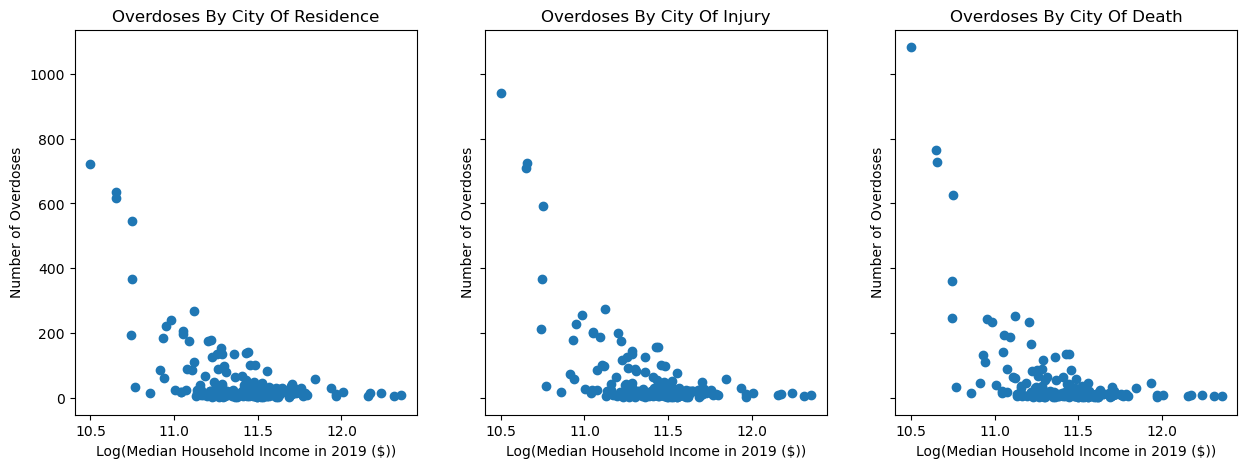

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Overdoses/1000 residents


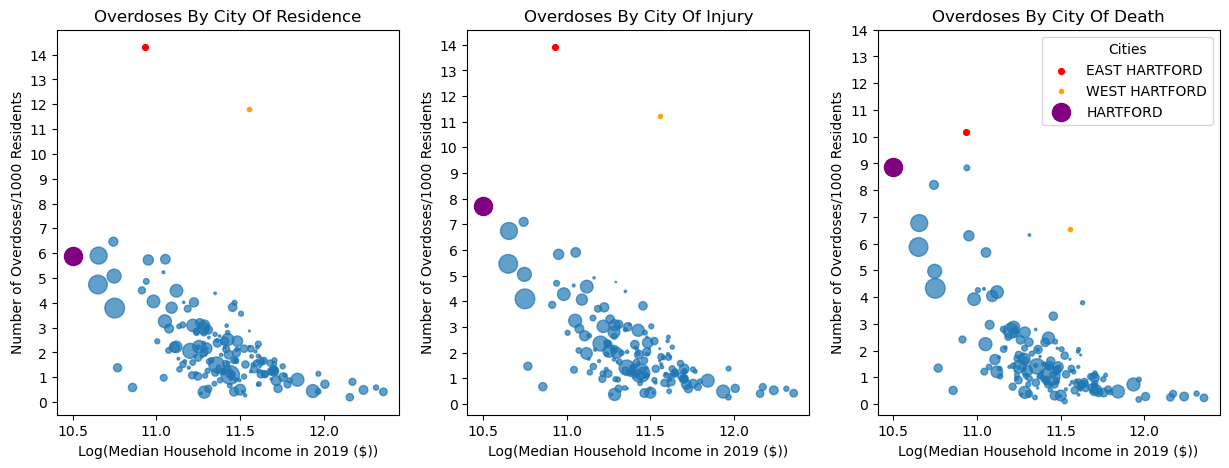

In [89]:
#Plot based on log of income
print('Total Number of Overdoses')
fig, ax = plt.subplots(1,3, figsize = (15,5), sharey=True)

dfs = [residence_city_merged, injury_city_merged, death_city_merged]
titles = ['Residence', 'Injury', 'Death']

for i, dataframe in enumerate(dfs):
    ax[i].scatter(dataframe['log_household_inc'], dataframe['num_overdose'])
    ax[i].set_xlabel('Log(Median Household Income in 2019 ($))')
    ax[i].set_ylabel('Number of Overdoses')
    ax[i].set_title('Overdoses By City Of ' + titles[i])
plt.show()


#Overdose per 1000 residents
print('-'*200)
print('Overdoses/1000 residents')

fig, ax = plt.subplots(1,3, figsize = (15,5))

city_colors = {
    'EAST HARTFORD': 'red',
    'WEST HARTFORD': 'orange',
    'HARTFORD': 'purple'}

for i, dataframe in enumerate(dfs):
   
   #Scale the size of dots based on population
    scaled_sizes = np.interp(dataframe['est_population'], (dataframe['est_population'].min(), dataframe['est_population'].max()), (1, 200))
    #plot the cities that are not highlighted
    other_cities = dataframe[~dataframe['city'].isin(city_colors.keys())]
    ax[i].scatter(other_cities['log_household_inc'], other_cities['overdose_per_1000'], s = scaled_sizes[~dataframe['city'].isin(city_colors.keys())], alpha = 0.7)

    #Plot the highlighted cities
    for city, color in city_colors.items():
        city_data = dataframe[dataframe['city'] == city]
        ax[i].scatter(city_data['log_household_inc'],city_data['overdose_per_1000'], s = scaled_sizes[dataframe['city'] == city], c = color, alpha = 1, label = city)

    #Adjust the labels
    ax[i].set_xlabel('Log(Median Household Income in 2019 ($))')
    ax[i].set_ylabel('Number of Overdoses/1000 Residents')
    ax[i].set_title('Overdoses By City Of ' + titles[i])

    #getting y axes to match
    ax[i].set_yticks(range(0,15))
    ax[i].set_yticklabels(range(0,15))

plt.legend(title='Cities', loc='upper right')

In [90]:
#Determine which cities are obvious outliers
residence_city_merged[residence_city_merged['overdose_per_1000'] > 5]

,city,num_overdose,household_income_avg,household_income_std,log_household_inc,est_population,overdose_per_1000
40,EAST HARTFORD,183,55967,3328,10.932518,12800,14.296875
62,HARTFORD,721,36278,1597,10.498967,122105,5.904754
86,NEW BRITAIN,368,46499,1969,10.747186,72495,5.076212
91,NEW LONDON,194,46298,5272,10.742854,30014,6.463650
97,NORTH CANAAN,17,62432,12457,11.041833,3251,5.229160
101,NORWICH,222,57052,2837,10.951718,38768,5.726372
140,TORRINGTON,196,63172,4132,11.053616,34044,5.757255
148,WATERBURY,635,42401,1495,10.654927,107568,5.903243
151,WEST HARTFORD,81,104281,3562,11.554844,6869,11.792109


Interesting Observations:  
- clear trend that increasing income lowers the number of overdoses by all measures (city of residence, injury, or death)
- There are two obvious ouliers (East Hartford and West Hartford) that appear overdose by residence city and injury city 
    - Not as apparent in death city.  Perhaps they are sent via ambulance to hospital system in Hartfort CT?
- Why is data more spread out in death_city plot?  Are deaths concentrating at cities with hospitals? 


### Investigating potential race differences in outlier cities (East and West Hartford)

In [91]:
#Population Average
avg_race = (df['race_binned'].value_counts()/len(df)).round(3)
#East Hartford
east_hartford_race = df[df['residence_city'] == 'EAST HARTFORD']['race_binned']
east_hartford_race = (east_hartford_race.value_counts()/len(east_hartford_race)).round(3)
#West Hartford
west_hartford_race = df[df['residence_city'] == 'WEST HARTFORD']['race_binned']
west_hartford_race = (west_hartford_race.value_counts()/len(west_hartford_race)).round(3)
#Hartford
hartford_race = df[df['residence_city'] == 'HARTFORD']['race_binned']
hartford_race = (hartford_race.value_counts()/len(hartford_race)).round(3)

#Combine into one table
race_merged = pd.concat([avg_race, east_hartford_race, west_hartford_race, hartford_race], axis=1)
race_merged.columns = ['pop_avg', 'east_hartford', 'west_hartford', 'hartford_race']
race_merged

,pop_avg,east_hartford,west_hartford,hartford_race
race_binned,,,,
White,0.852,0.836,0.827,0.674
Black,0.129,0.148,0.123,0.290
Unknown,0.008,0.005,0.012,0.014
Asian,0.006,0.011,0.037,0.011
Other,0.005,NaN,NaN,0.011


Notes:  Racial differences by residence location does not seem to explain why East and West Hartford are outliers in deaths/1000 residents

## Exploring Fentanyl vs non-Fentanyl deaths by income

Note: Only working with `residence_city` from now on.  Can do further analysis to investigate `injury_city` and `death_city`

In [92]:
# Breakup by fentanyl and non-fentanyl related deahts.  Both 'fentanyl' and 'fentanyl_analogue' are considered as fentanyl
fentanyl_by_city = pd.DataFrame(df[df['fentanyl'] == 'Y'].groupby('residence_city').size()).reset_index()
non_fentanyl_by_city = pd.DataFrame(df[df['fentanyl'] != 'Y'].groupby('residence_city').size()).reset_index()
fentanyl_by_city.columns = ['city', 'num_fen_overdose']
non_fentanyl_by_city.columns = ['city', 'num_non_fen_overdose']

#Check to make sure no data was lost after splitting into fentanyl and non-fentanyl (all overdoses = fentanyl + non-fentanyl + NaN values)
print('Test is:',len(df) == int(fentanyl_by_city.sum()[1]) + int(non_fentanyl_by_city.sum()[1]) + df['residence_city'].isna().sum())

#----------------------------------------------------------------------
#Create merged df's
fentanyl_city_2 = pd.merge(fentanyl_by_city, residence_by_city, how = 'inner', on = 'city')
fentanyl_city_2['fentanyl_overdose_frac'] = fentanyl_city_2['num_fen_overdose']/fentanyl_city_2['num_overdose']


fentanyl_city_merged = pd.merge(fentanyl_city_2, income_pop_df, how = 'inner', on = 'city')
fentanyl_city_merged['overdose_per_1000'] = fentanyl_city_merged['num_fen_overdose']/fentanyl_city_merged['est_population']*1000
fentanyl_city_merged = fentanyl_city_merged[fentanyl_city_merged['num_overdose'] >= 5]


Test is: True


### Plot Fraction of Fentanyl Overdoses Based on Income

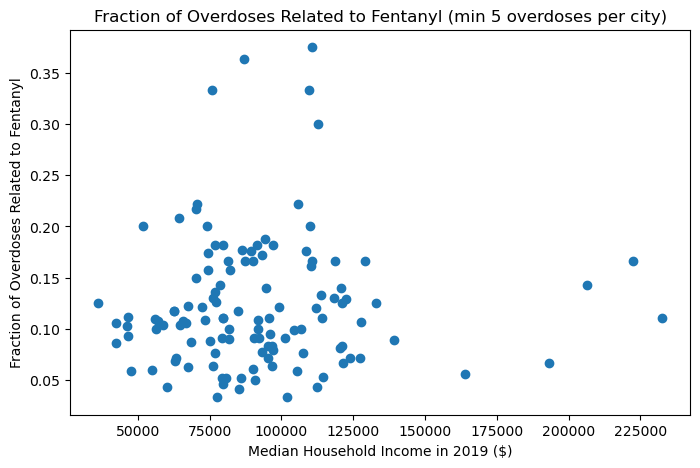

In [93]:
fig, ax = plt.subplots(figsize = (8,5))

ax.scatter(fentanyl_city_merged['household_income_avg'], fentanyl_city_merged['fentanyl_overdose_frac'])
ax.set_xlabel('Median Household Income in 2019 ($)')
ax.set_ylabel('Fraction of Overdoses Related to Fentanyl')
ax.set_title('Fraction of Overdoses Related to Fentanyl (min 5 overdoses per city)')
plt.show()


Observations:  Fentanyl appears to affect all income levels similarly

## Determine Which Drugs are Used by Which Demographics

In [94]:
#switching over to filtered dataframe
df = df_filtered

In [95]:
drugs = ['fentanyl', 'cocaine_and_fentanyl',
       'cocaine_and_fentanyl_and_ethanol', 'fentanyl_and_ethanol',
       'heroin_and_fentanyl_and_Opioids', 'cocaine',
       'cocaine_and_fentanyl_and_Opioids', 'heroin', 'Opioids',
       'cocaine_and_fentanyl_and_Other Depressants']

#Calculate the racial breakdown of overdoses for each drug.  
#Example: if drug_a has a value of 0.8 for White, then 80% of people who had that
#drug in their system were white
def calculate_racial_fraction(drug):
    temp_df = df[df[drug] == 'Y']['race_binned']
    temp_df = (temp_df.value_counts() / len(temp_df)).round(3)
    return pd.DataFrame({drug: temp_df}).T

drug_by_race = pd.concat([calculate_racial_fraction(drug) for drug in drugs])
drug_by_race = drug_by_race[['White', 'Black', 'Asian', 'Other', 'Unknown']] #ordering the columns consistently


#Calculate the drug use fraction for each race  
#Example: if drug_a has a value of 0.8 for White, then 80% of white people who overdosed had drug_a in their system
def calculate_drug_fraction(data, drug):
    temp_data = data[data[drug] == 'Y']
    fraction = len(temp_data)/len(data)
    return round(fraction,3)

by_race = df.groupby('race_binned')
race_by_drug = pd.DataFrame()
for drug in drugs:
    drug_frac = by_race.apply(calculate_drug_fraction, drug = drug)
    race_by_drug[drug] = drug_frac

race_by_drug = race_by_drug.T #Transposing 
race_by_drug = race_by_drug[['White', 'Black', 'Asian', 'Other', 'Unknown']] #ordering the columns consistently




### Plot Racial Profile for Individual Drugs

In these results, look at each drug as a unique sample.  Then compare the racial profile of those who overdosed using that drug.  All races will add to a value of 1 for each drug.

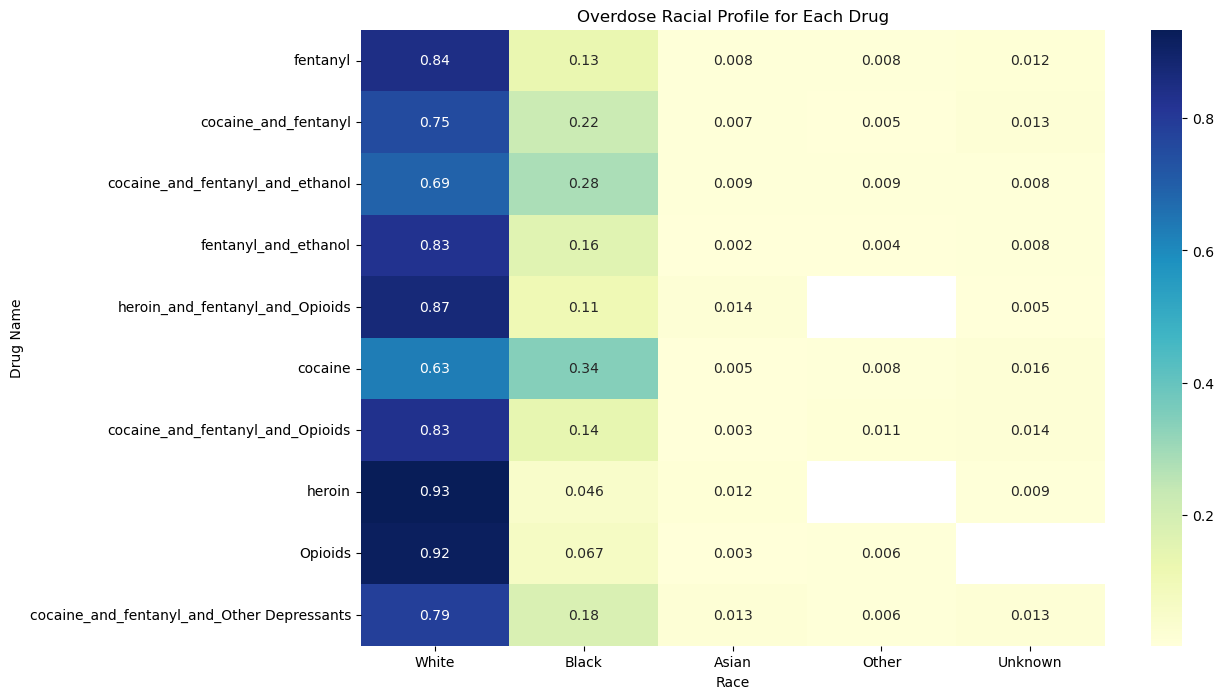

In [96]:
plt.figure(figsize=(12, 8))
sns.heatmap(drug_by_race, cmap='YlGnBu', annot=True)
plt.title('Overdose Racial Profile for Each Drug')
plt.xlabel('Race')
plt.ylabel('Drug Name')
plt.show()

### Plot Drug Usage for Each Racial Demographic

In these results, consider each race as an individual sample.  Then compare the probability that each drug was found in their system given their race.  Values will not add to 1 when summed, because victims can have more than one drug in their system at time of death.

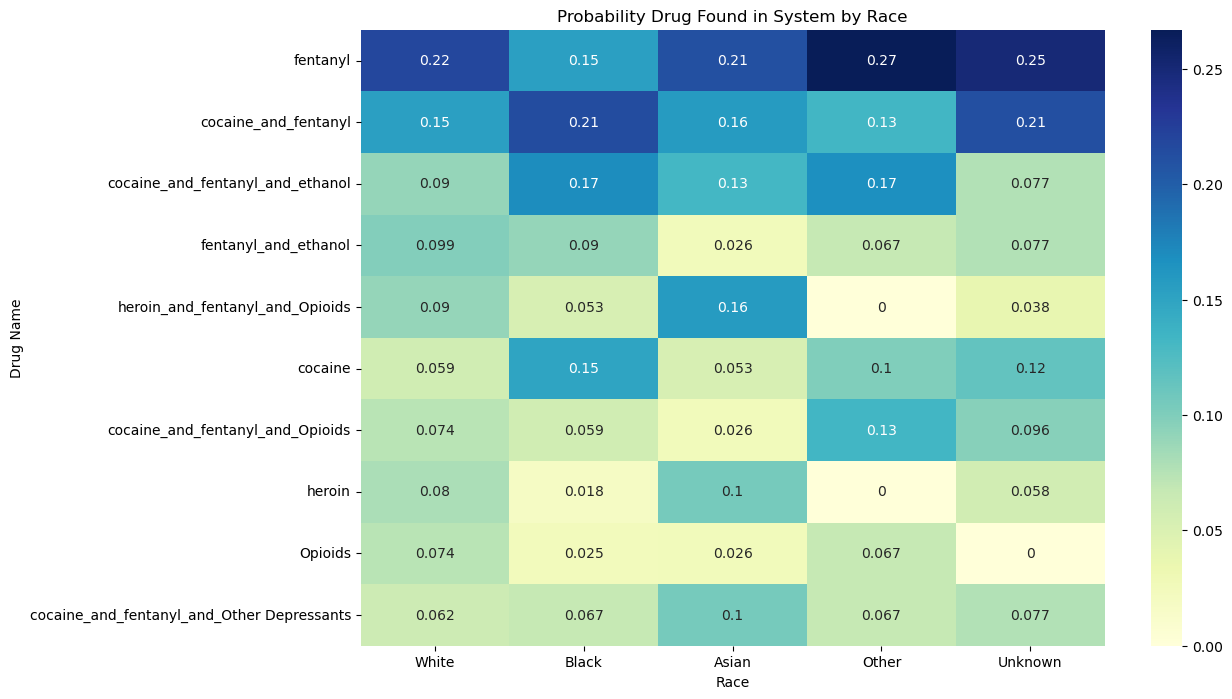

In [97]:
plt.figure(figsize=(12, 8))
sns.heatmap(race_by_drug, cmap='YlGnBu', annot=True)
plt.title('Probability Drug Found in System by Race')
plt.xlabel('Race')
plt.ylabel('Drug Name')
plt.show()

Observations:
- Black demographic has highest level of cocaine usage, but lowest use of benzodiaepine
    - White has inverted results - lowest level of cocaine, but highest level of benzos
- fentanyl overdose far outweighs any other drug, followed by cocaine, and then ethanol
- meth has a surprisingly low mortality rate
    - or perhaps many fewer people are using it in CT?

## Determine How Age Affects Drug Usage

In [98]:
#Add an age bin column to make determination easier.  Breakdown by decade

def bin_ages(age):
    if age < 20:
        return '<20'
    if age <= 30:
        return '20-30'
    if age <=40:
        return '30-40'
    if age <50:
        return '40-50'
    if age <60:
        return '50-60'
    if age >60:
        return '>60'
    

df['age_binned'] = df['age'].apply(bin_ages)


In [99]:
#Calculate the age breakdown of overdoses for each drug.  
#Example: if drug_a has a value of 0.8 for 20-30, then 80% of people who had that drug in their system were 20-30 years old
def calculate_age_fraction(drug):
    temp_df = df[df[drug] == 'Y']['age_binned']
    temp_df = (temp_df.value_counts() / len(temp_df)).round(3)
    return pd.DataFrame({drug: temp_df}).T

drug_by_age = pd.concat([calculate_age_fraction(drug) for drug in drugs])
drug_by_age = drug_by_age[['<20','20-30','30-40','40-50','50-60','>60']] # moving columns into chronological order


#Calculate the drug use fraction for each age group  
#Example: if drug_a has a value of 0.8 for 20-30, then 80% of 20-30 year olds who overdosed had drug_a in their system
def calculate_drug_fraction(data, drug):
    temp_data = data[data[drug] == 'Y']
    fraction = len(temp_data)/len(data)
    return round(fraction,3)


by_age = df.groupby('age_binned')
age_by_drug = pd.DataFrame()
age_by_drug_total = []
for drug in drugs:
    drug_frac = by_age.apply(calculate_drug_fraction, drug = drug)
    age_by_drug[drug] = drug_frac
    age_by_drug_total.append(round(len(df[df[drug] == 'Y'])/len(df),3))
age_by_drug = age_by_drug.T
age_by_drug = age_by_drug[['<20','20-30','30-40','40-50','50-60','>60']]

#Add in the population average
total_drug = {'drugs':drugs, 'total_pop': age_by_drug_total}
age_by_drug_total = pd.DataFrame(total_drug)
age_by_drug_total.set_index('drugs', inplace=True)
age_by_drug = pd.concat([age_by_drug, age_by_drug_total], axis = 1)


In [100]:
drug_by_age.fillna(0, inplace=True)

### Plot Age Profile for Individual Drugs

In these results, look at each drug as a unique sample.  Then compare the age range of those who overdosed using that drug.  All ages will add to a value of 1 for each drug.

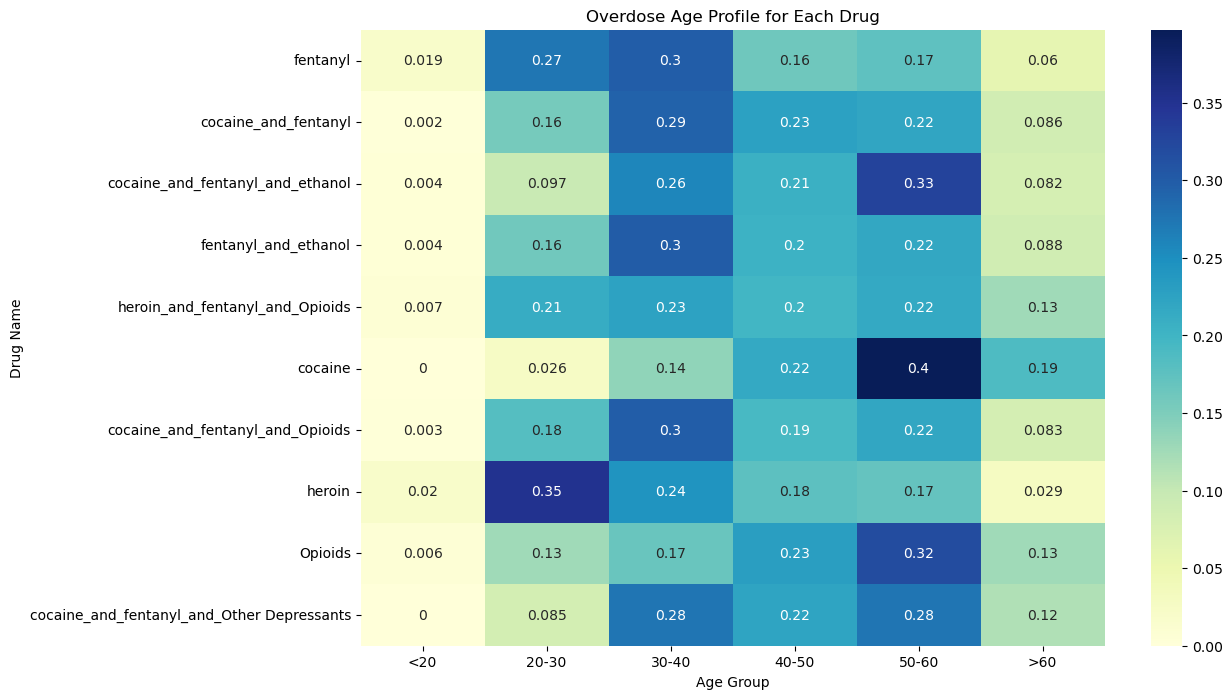

In [101]:
plt.figure(figsize=(12, 8))
sns.heatmap(drug_by_age, cmap='YlGnBu', annot=True)
plt.title('Overdose Age Profile for Each Drug')
plt.xlabel('Age Group')
plt.ylabel('Drug Name')
plt.show()

Observations:
- Outliers:
    - Meth highly correlated with 30-40 age group.  
    - Morphine for 50-60 age group
    - hydrocodone for 
- How many data points are for outliers though?
- Should we think about bucketing classes of drugs (i.e. oxycodone, oxymorphone, hydrocodone, heroine, fentanyl all count as 'opiod')
    - concerned this may mask everything behind overwhelming fentanyl numbers


### Plot Drug Usage for Each Age Group

In these results, consider each age as an individual sample.  Then compare the probability that each drug was found in their system given their age range.  Values will not add to 1 when summed, because victims can have more than one drug in their system at time of death.

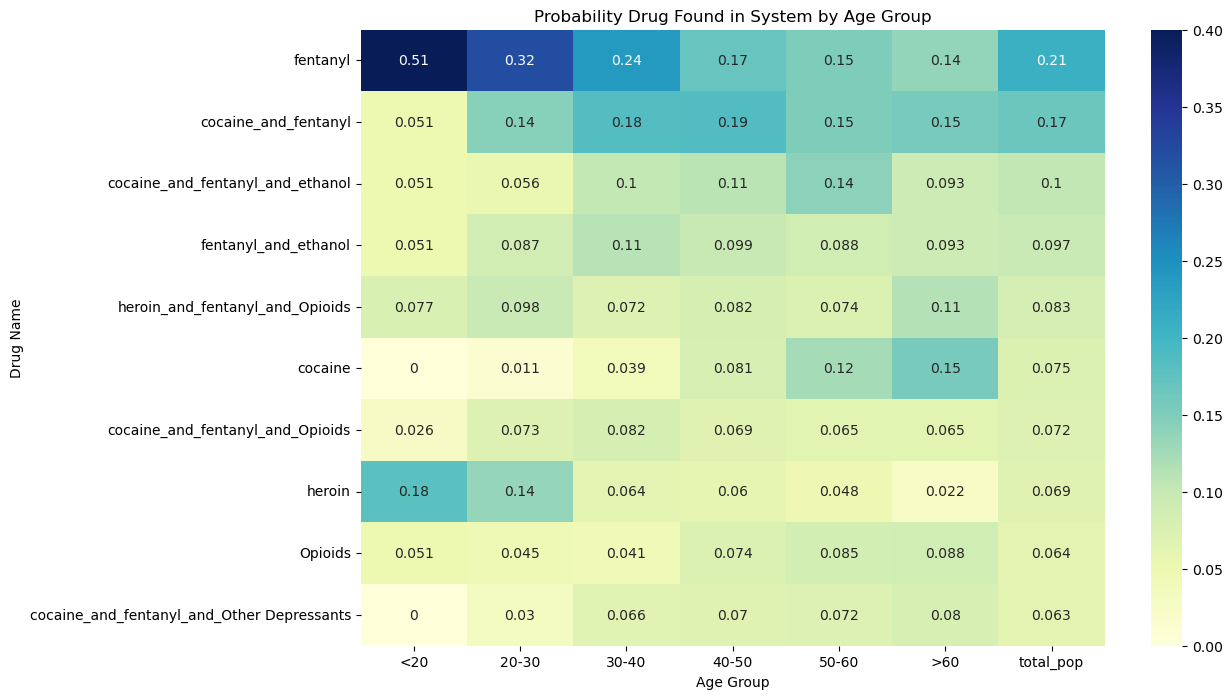

In [107]:
plt.figure(figsize=(12, 8))
sns.heatmap(age_by_drug, cmap='YlGnBu', annot=True, vmax = 0.4)
plt.title('Probability Drug Found in System by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Drug Name')
plt.show()

Observations:
- Fentanyl affects all age groups fairly evently, but may be wost in the 30-40 agegroup
- Ethanol seems to skew towards the older generations
- cocaine has lower rates at younger ages, while heroine has highest rates
- Methadone is much higher in the middle ages, but may have too few samples for reasonable statistics


### Plot Histograms of The Age Profile of Overdoses

Text(0.5, 1.0, 'Number of Overdoses by Age Group')

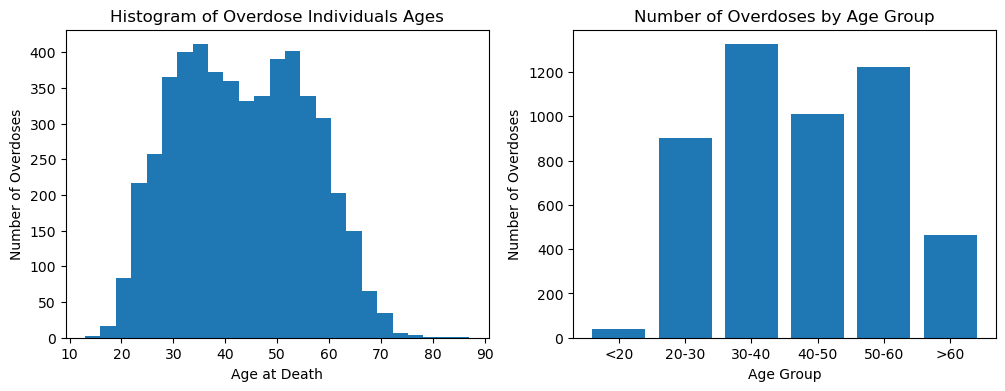

In [109]:
fig, ax = plt.subplots(1,2, figsize = (12,4))

ax[0].hist(df['age'], bins = 25)
ax[0].set_xlabel('Age at Death')
ax[0].set_ylabel('Number of Overdoses')
ax[0].set_title('Histogram of Overdose Individuals Ages')


age_order = ['<20','20-30','30-40','40-50','50-60','>60']
age_counts = df['age_binned'].value_counts().reindex(age_order)


#ax[1].bar(df['age_binned'].value_counts().index, df['age_binned'].value_counts().values)
ax[1].bar(age_counts.index, age_counts.values)
ax[1].set_xlabel('Age Group')
ax[1].set_ylabel('Number of Overdoses')
ax[1].set_title('Number of Overdoses by Age Group')

In [110]:
age_counts

age_binned
<20        39
20-30     904
30-40    1325
40-50    1011
50-60    1222
>60       464
Name: count, dtype: int64

Observation: Two main peaks, one in the 30-40 range and one in the 50-60 range.  May just be random noise, or may say something about the demographics that use drugs more regularly

## Determine How Gender Affects Drug Usage

In [104]:
#Calculate the age breakdown of overdoses for each drug.  
#Example: if drug_a has a value of 0.8 for 20-30, then 80% of people who had that
#drug in their system were 20-30 years old
def calculate_gender_fraction(drug):
    temp_df = df[df[drug] == 'Y']['sex']
    temp_df = (temp_df.value_counts() / len(temp_df)).round(3)
    return pd.DataFrame({drug: temp_df}).T

drug_by_gender = pd.concat([calculate_gender_fraction(drug) for drug in drugs])
drug_by_gender = drug_by_gender[['Male', 'Female']] # moving columns into consistent order


#Calculate the drug use fraction for each age group  
#Example: if drug_a has a value of 0.8 for 20-30, then 80% of 20-30 year olds
#who overdosed had drug_a in their system
def calculate_drug_fraction(data, drug):
    temp_data = data[data[drug] == 'Y']
    fraction = len(temp_data)/len(data)
    return round(fraction,3)

by_gender = df.groupby('sex')
gender_by_drug = pd.DataFrame()
for drug in drugs:
    drug_frac = by_gender.apply(calculate_drug_fraction, drug = drug)
    gender_by_drug[drug] = drug_frac
gender_by_drug = gender_by_drug.T
gender_by_drug = gender_by_drug[['Male', 'Female']] # moving columns into consistent order

### Plot Gender Breakdown For Individual Drugs

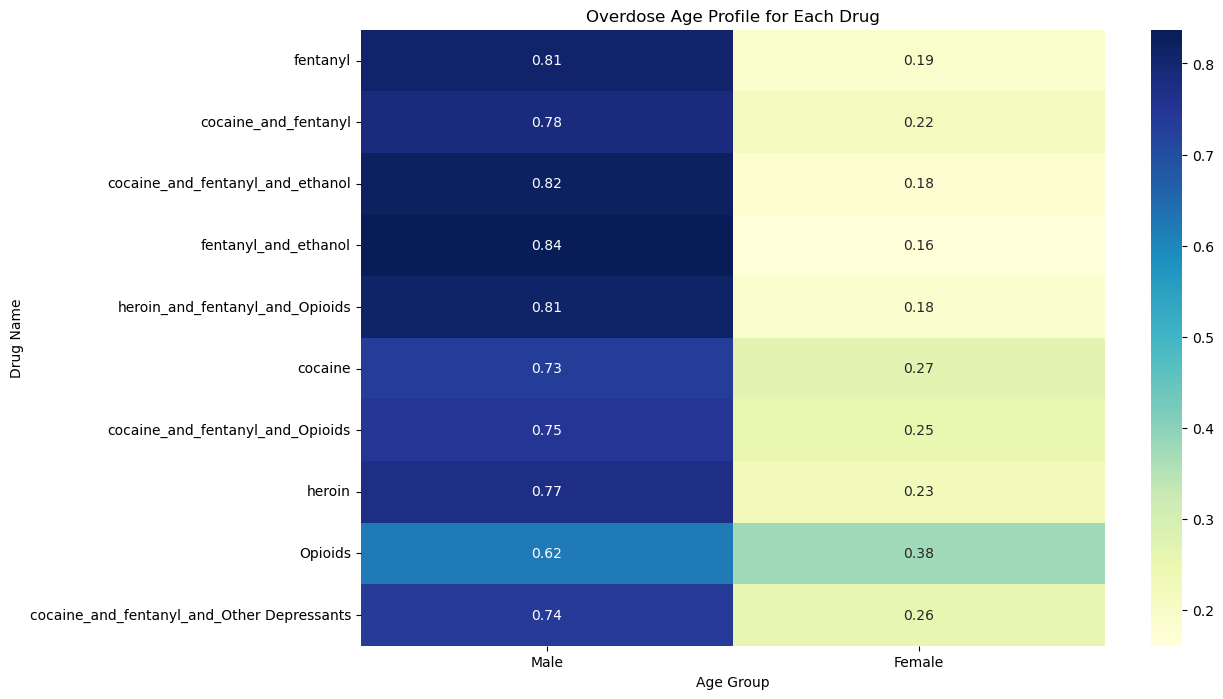

In [105]:
plt.figure(figsize=(12, 8))
sns.heatmap(drug_by_gender, cmap='YlGnBu', annot=True)
plt.title('Overdose Age Profile for Each Drug')
plt.xlabel('Age Group')
plt.ylabel('Drug Name')
plt.show()

### Plot Drug Usage For Each Gender

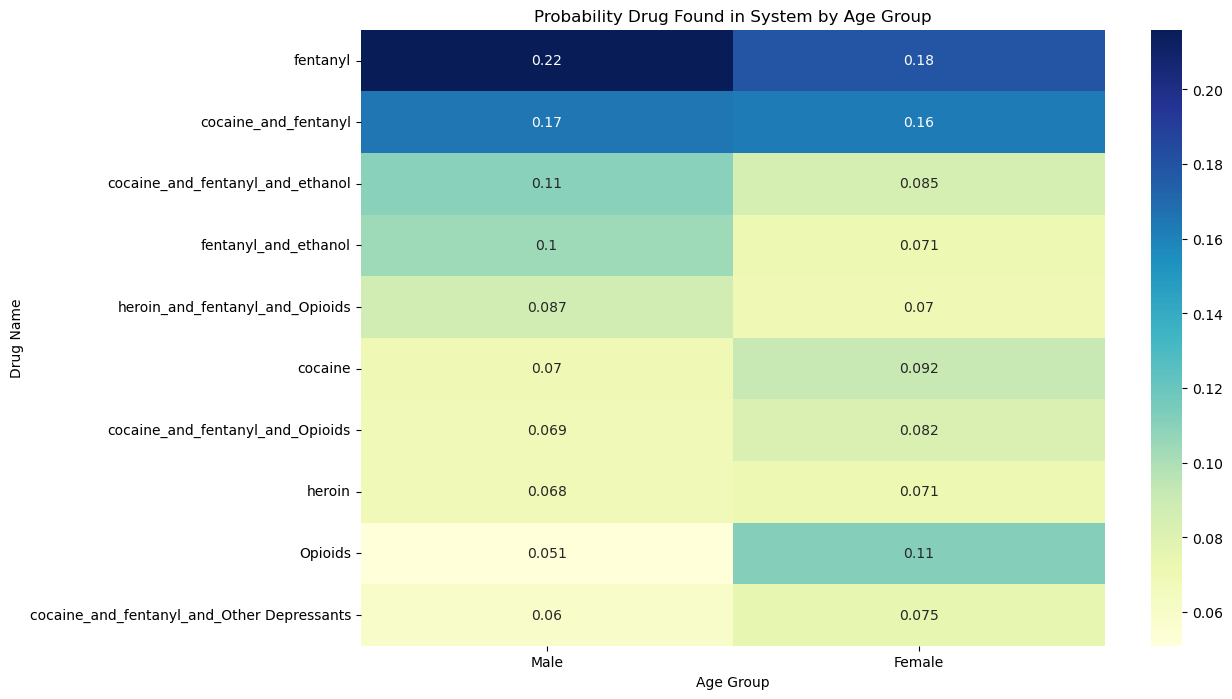

In [106]:
plt.figure(figsize=(12, 8))
sns.heatmap(gender_by_drug, cmap='YlGnBu', annot=True)
plt.title('Probability Drug Found in System by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Drug Name')
plt.show()